In [3]:
import numpy as np
import sys
import os
import glob
import getpass
import argparse
import pickle
import matplotlib.cm as cm
import pandas as pd
import matplotlib.pyplot as plt
import collections 
def makehash():
    return collections.defaultdict(makehash)


In [5]:
from utils import save_dir, analyze_dir, result_dir
model_identifier = 'NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.016_sigma=0.833_nfeat=936-train_test-fixed'
data_=pickle.load(open(os.path.join(save_dir,model_identifier, f'{model_identifier}_distance_pooled.pkl'),'rb'))



In [74]:
dummy=[]
for k,item in data_['distance_results']['layer_1_Linear'][0].items():
    print(f"{item['epoch']},{item['batchidx']}")
    dummy.append(item['epoch']*10000+item['batchidx'])

1,120
1,180
1,240
1,300
1,480
1,540
1,600
1,660
1,720
1,780
1,840
1,900
1,960
1,1020
1,1080
1,1140
1,1200
1,1260
1,1320
1,1380
1,1440
1,1500
1,1560
2,60
2,120
2,180
2,240
2,300
2,360
2,420
2,480
2,540
2,600
2,660
2,720
2,780
2,840
2,900
2,960
2,1020
2,1080
2,1140
2,1200
2,1260
2,1500
2,1560
3,60
3,180
4,1260
3,240
3,300
3,540
3,360
3,660
3,600
3,480
3,1500
3,720
3,840
3,900
3,960
3,1020
3,1260
3,1440
3,1320
3,1140
3,1080
3,1200
3,1560
4,60
4,120
4,180
4,240
4,360
4,420
4,480
4,540
4,600
4,660
4,720
4,780
4,840
4,900
4,960
4,1020
4,1080
4,1140
3,420
4,1200
4,1380
6,1200
3,120
4,1500
5,600
4,1560
5,240
5,120
5,420
5,300
5,180
5,360
5,480
5,540
5,900
5,960
5,720
5,60
5,840
5,660
5,1260
5,1200
5,1440
5,1380
5,780
5,1020
5,1320
5,1080
6,120
6,240
6,300
6,360
6,660
6,180
5,1560
6,600
6,540
5,1140
6,480
6,420
6,1260
6,1020
6,840
6,780
6,1080
6,960
6,900
6,1140
5,1500
6,1500
4,1440
6,1380
7,180
7,120
6,1440
7,60
7,480
7,420
7,360
6,1560
7,300
7,240
6,1320
7,660
7,720
7,540
7,600
7,780
7,840
7,

TypeError: unsupported operand type(s) for *: 'collections.defaultdict' and 'int'

In [79]:
fixed_idx=np.argsort(dummy)

In [32]:
layer_dist_over_time=[]
for layer in data_['distance_results'].keys():
    hier_distance_over_time=[]
    for hier in data_['distance_results'][layer].keys():
        distance_over_time=[]
        for key,item in data_['distance_results'][layer][hier].items():
            distance_over_time.append(item['distance'].mean(axis=1))
        hier_distance_over_time.append(np.stack(distance_over_time))
    layer_dist_over_time.append(hier_distance_over_time)

In [56]:
hier_data.shape

(360, 32)

In [50]:
list(data_['distance_results']xf.keys())

[0, 1, 2, 3, 4]

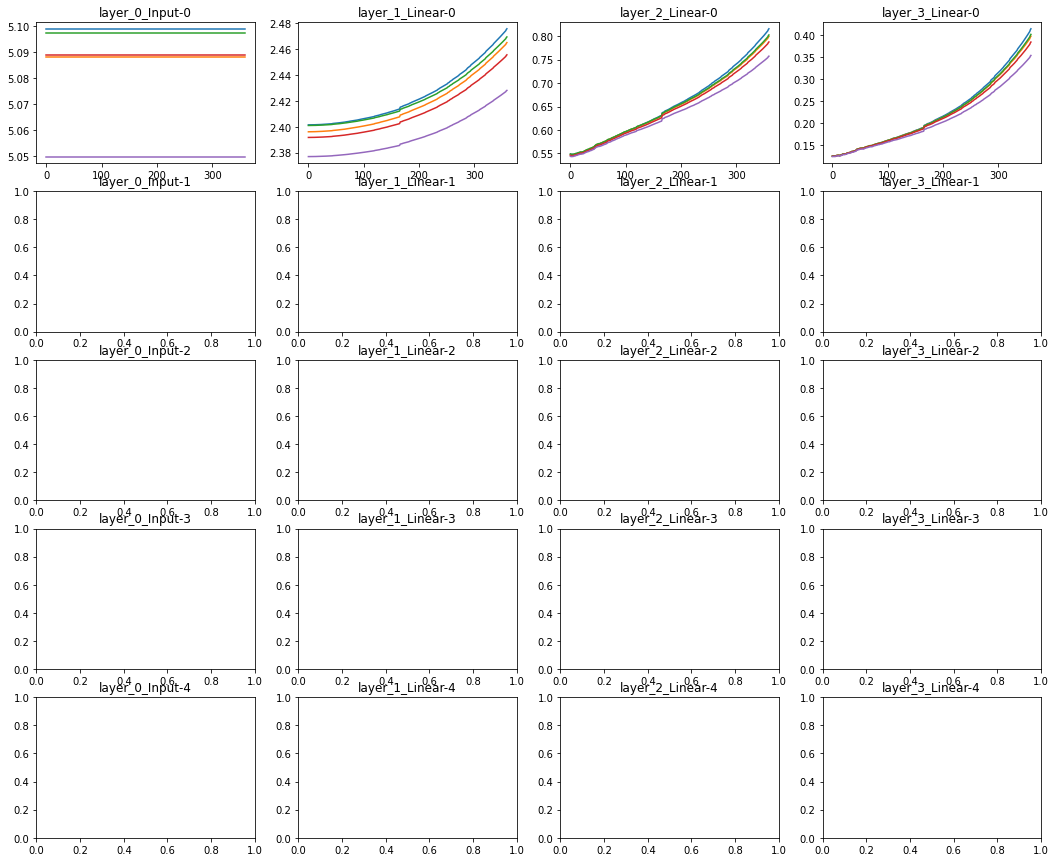

In [80]:
fig, axes = plt.subplots(len(layer_dist_over_time[0]), len(layer_dist_over_time), figsize=(18, 15))
for k,layer_data in enumerate(layer_dist_over_time):
        for m, hier_data in enumerate(layer_data):
                axes[m,k].set_title(f"{list(data_['distance_results'].keys())[k]}-{list(data_['distance_results']['layer_0_Input'].keys())[m]}")
                axes[0,k].plot(hier_data.mean(axis=1)[fixed_idx])

# training accurary for different sigma and beta 

In [ ]:
from utils import save_dir, analyze_dir

In [ ]:
struct_list=['partition','tree']
nhier=[1,6]
beta=[0.0, 0.016, 0.033, 0.05]
sigma=[0.0, 0.833, 1.667, 2.5]
nclass=[64,96]
model_train_test_acc=[]
for b in beta:
    for s in sigma:
        for n in nclass:
            for idx , struct in enumerate(struct_list):
                model=f"NN-{struct_list[idx]}_nclass={n}_nobj={n * 1000}_nhier={nhier[idx]}_beta={b}_sigma={s}_nfeat=3072-train_test-fixed"
                model_train_acc=f'acc_train_{model}.csv'
                model_test_acc=f'acc_test_{model}.csv'
                train=open(os.path.join(save_dir,model,model_train_acc),'r')
                train_lines=[float(x) for x in train.read().splitlines()]
                train.flush()
                test=open(os.path.join(save_dir,model,model_test_acc),'r')
                test_lines=[float(x) for x in test.read().splitlines()]
                test.flush()

                model_train_test_acc.append(dict(beta=b,sigma=s,nclass=n,structure=struct,n_hier=nhier[idx],name=model,train_acc=train_lines,test_acc=test_lines))

In [ ]:
    for i in range(layer_cap.shape[1]):
            im=axes[4+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[4+j].set_ylabel(r'$\alpha_M$', fontsize=18)
    axes[4+j].set_xlim(min(seq), max(seq))
    axes[4+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    #axes[4+j].legend()
    axes[4+j].set_title(key)
    #fig.colorbar(im, ax=axes[4*(k+1)])

idx=8
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['radii'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$R_M$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))

    axes[idx+j].set_title(key)

idx=12
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['dimensions'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$D_M$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    
    axes[idx+j].set_title(key)

idx=16
for j, key in enumerate(mftma_res.keys()):
    mftma=[x['mftma'] for x in mftma_res[key]]
    layer_cap=[[x['correlations'] for x in y] for y in mftma]
    layer_cap=np.stack(layer_cap).squeeze()   
    h0=cm.get_cmap('plasma_r',(layer_cap.shape[1]))
    h0_c=np.flipud(h0(np.arange(layer_cap.shape[1])/layer_cap.shape[1]))
    for i in range(layer_cap.shape[1]):
            im=axes[idx+j].plot(layer_cap[:,i],color=h0_c[i,:],linewidth=1,label='hier_'+str(i))
    axes[idx+j].set_ylabel(r'$\rho_{center}$', fontsize=18)
    axes[idx+j].set_xlim(min(seq), max(seq))
    axes[idx+j].set_ylim(np.nanmin(layer_cap),np.nanmax(layer_cap))
    axes[idx+j].legend()
    axes[idx+j].set_title(key)

plt.suptitle(model_identifier)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(result_dir,analyze_identifier,model_identifier+'_hierarchy_vals_during_training.png'),transparent=True)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes=axes.flatten()
st='partition'
ncl=64
ax=axes[0]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')


st='partition'
ncl=96
ax=axes[1]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')


st='tree'
ncl=64
ax=axes[2]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')

st='tree'
ncl=96
ax=axes[3]
data=[(x['beta'],x['sigma'],x['train_acc'][-1],x['test_acc'][-1]) for x in model_train_test_acc if x['structure']==st and x['nclass']==ncl ]
b_val=np.asarray(data)[:,0].reshape(4,4)
s_val=np.asarray(data)[:,1].reshape(4,4)
test_val=np.asarray(data)[:,3].reshape(4,4)
ax.imshow(test_val)
ax.set_xticks(np.arange(s_val.shape[0]))
ax.set_yticks(np.arange(b_val.shape[0]))
ax.set_xticklabels(s_val.mean(axis=0))
ax.set_yticklabels(b_val.mean(axis=1))
for i in range(b_val.shape[0]):
    for j in range(s_val.shape[0]):
        text = ax.text(j, i, test_val[i, j],
                       ha="center", va="center", color="w",fontweight='bold')
ax.set_title(f'{st}, {ncl} classes',fontsize=14,fontweight='bold')

ax.set_xlabel('sigma',fontsize=14)
ax.set_ylabel('beta',fontsize=14)
plt.suptitle('test accuracy',fontsize=16,fontweight='bold')
fig.tight_layout()

if not os.path.exists(os.path.join(result_dir,'training_result')):
        os.mkdir(os.path.join(result_dir,'training_result'))
fig.savefig(os.path.join(result_dir,'training_result',f'test_accu_structures:partition,tree_betas:{b_val.min()},{b_val.max()}_sigmas:{s_val.min()},{s_val.max()}.png'),transparent=True)